# Información 

1. Descricpción del problema
1. Data cleaning y formatting
1. EDA
3. Feature selecction y engenieering
4. Comparación de modelos
5. Hyperparameter tunning sobre el mejor modelo
6. Evaluacion
7. Interpretación
8. Conclusión

OBJETIVO: Determinar que personas van a ser morosos en los prestamos

# 0. IMPORTACIONES Y SETEOS

## Imports 

In [1]:
# Pandas y numpy para manipulación
import pandas as pd
import numpy as np
# Librerias para gráficos 
import seaborn as sns
import matplotlib.pyplot as plt
# Herramientas de modelado
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
# from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor


# Funciones de DS
import DSImplementation as dsimp
# Funciones para analizar valores faltantes 
import missingno as msno

## Seteos

In [2]:
# Para evitar que salgan advertencias por usar dataframes sin un .copy()
pd.options.mode.chained_assignment = None

# Se setea un maximo de 60 columnas para visualizar
pd.set_option('display.max_columns', 60)

# Matplotlib visualización en la celda
%matplotlib inline

# 1. DESCRIPCIÓN DEL PROBLEMA 

* Fecha_Pago: fecha cuando la persona pago la cuota del prestamo. Es diferente a la fecha de acreditación. 
* Vencimiento: fecha en la cual vence el prestamos, y hay algunos prestamos con doble fecha de vencimiento. El primer vencimiento es siempre el 20 y el segundo es el 30. No todos los tipos de linea de prestamos admiten segundo vencimiento. 
* Tipo de prestamo: numero de ID, cada ID corresponde a un barrio diferente. El IVC construye de a un barrio por vez. Puede pasar que para un mismo barrio puedo tener diferentes tipo de prestamo (linea de prestamo). 
* Numero_Prestamo: Es el ID del prestamo. Es unico y no se repite
* Total_prestamo[CALCULADO]: el total que tiene que pagar para el prestamos, no es lo que le falta. Se calcula como suma de capital, interes y gastos.
* Total_cutas: cantidad de cuotas que tiene el prestamo
* Numero de cuota: es la cuota que se esta pagando. Se permite saltear cuotas, es decir, se puede no pagar la 16 y pagar la 17. De esta forma la persona quedaria adeudnado la cuota 16.
* Pago: monto del recibo de pago. Cada pago puede no corresponder a una unica cuota. Puede ser una de cuatro opciones: Pago de cuota completa, pago parcial de cuota, adelanto de cuota, pago completo del prestamo. 
* Genero: Masculino o Femenino, binario
* Edad[CALCULADO]: la edad del que pide el prestamo
* Paga_en_termino [CALCULADO]: si pago antes del vencimiento. A partir de 2021 se introdujo segundo vencimiento (el 30). 1 es que esta en termino, 0 que no pago en termino
* Refinaciado [CALCULADO] : indica si el prestamo fue refinanciado en el pasado. Es decir, cuando se reestructura la deuda. 1 es que esta refinanciado, 0 que no esta refinanciado. 


Nuestro campo targe es "Pagado en termino" para evaluar si el mes que viene me van a pagar o no 

Columnas a agregar:

* Numerico indicando tipo de pago. 1: Pago de cuota completa, 2: pago parcial de cuota, 3: adelanto de cuota, 4: pago completo del prestamo
* Faltante total a pagar: el monto que falta pagar del prestamo

Preguntas:

* Agrego columnas que traiga cantidad de cuotas no pagas en terminas para ese prestamo por esa persona?


# 2. DATA CLEANING Y FORMATING

## Carga del dataset a trabajar 

In [3]:
# Se carga el dataset
data_train = pd.read_csv("Data/DATASET TP4 VERSION 2.csv")

In [4]:
data_train.head(5)

,Fecha_Pago,Vencimiento,Tipo_Prestamo,Numero_Prestamo,Total_Prestamo,Total_cuotas,Numero_Cuota,Pago,Genero,Edad,Paga_en_Termino,Refinanciado
0,2020-01-02 00:00:00.000,2020-01-20 00:00:00.000,1,11004094,30000.00,36.0,16,842.81,NaN,NaN,1,0
1,2020-01-02 00:00:00.000,2020-02-20 00:00:00.000,1,11004094,30000.00,36.0,17,2.10,NaN,NaN,1,0
2,2020-01-02 00:00:00.000,2020-02-20 00:00:00.000,50,10991941,71113.43,240.0,221,286.26,M,122.0,1,0
3,2020-01-02 00:00:00.000,2020-04-20 00:00:00.000,50,10991941,71113.43,240.0,223,286.26,M,122.0,1,0
4,2020-01-02 00:00:00.000,2020-03-20 00:00:00.000,50,10991941,71113.43,240.0,222,286.26,M,122.0,1,0


In [5]:
data_train.head(5)

,Fecha_Pago,Vencimiento,Tipo_Prestamo,Numero_Prestamo,Total_Prestamo,Total_cuotas,Numero_Cuota,Pago,Genero,Edad,Paga_en_Termino,Refinanciado
0,2020-01-02 00:00:00.000,2020-01-20 00:00:00.000,1,11004094,30000.00,36.0,16,842.81,NaN,NaN,1,0
1,2020-01-02 00:00:00.000,2020-02-20 00:00:00.000,1,11004094,30000.00,36.0,17,2.10,NaN,NaN,1,0
2,2020-01-02 00:00:00.000,2020-02-20 00:00:00.000,50,10991941,71113.43,240.0,221,286.26,M,122.0,1,0
3,2020-01-02 00:00:00.000,2020-04-20 00:00:00.000,50,10991941,71113.43,240.0,223,286.26,M,122.0,1,0
4,2020-01-02 00:00:00.000,2020-03-20 00:00:00.000,50,10991941,71113.43,240.0,222,286.26,M,122.0,1,0


## Tipo de datos, valores faltantes y valores nulos 

### Valores nulos y tipo de datos 

In [6]:
# Cantidad de datos totales
data_train.shape

(203851, 12)

In [7]:
# Se observa los tipos de columna
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203851 entries, 0 to 203850
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Fecha_Pago       203851 non-null  object 
 1   Vencimiento      188187 non-null  object 
 2   Tipo_Prestamo    203851 non-null  int64  
 3   Numero_Prestamo  203851 non-null  int64  
 4   Total_Prestamo   192554 non-null  float64
 5   Total_cuotas     192554 non-null  float64
 6   Numero_Cuota     203851 non-null  int64  
 7   Pago             203851 non-null  float64
 8   Genero           60101 non-null   object 
 9   Edad             60101 non-null   float64
 10  Paga_en_Termino  203851 non-null  int64  
 11  Refinanciado     203851 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 18.7+ MB


In [8]:
# Columnas que son de tipo objeto y hay que parcearlas
data_train.select_dtypes(include="object").columns

Index(['Fecha_Pago', 'Vencimiento', 'Genero'], dtype='object')

Observamos que las columnas  "Fecha de pago", "Vencimiento" y "Genero" son de tipo objetvo. Vamos a transformarlos. Tambien observamos que Edad se encuentra como un float

 ### Parseo de datos

 ### Valores faltantes 

No se encontraron valores faltantes

In [9]:
dsimp.missing_values_table(data_train)

Your selected dataframe has 12 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Genero,143750,70.5
Edad,143750,70.5
Vencimiento,15664,7.7
Total_Prestamo,11297,5.5
Total_cuotas,11297,5.5


Observamos muchos valores faltantes de Genero y Edad. Particularmente edad posee valores raros porque estan mal cargada la feche de nacimiento. 

Vencimiento, total_prestamo, Total_cuotas porque es un ingreso al sistema que no corresponde a un prestamo identificiado con numero de prestamo igual a 0 oa a 1

La edad esta llenada a menor porque cargaron mal los datos, de pajeros ponen 1900. 

<AxesSubplot:>

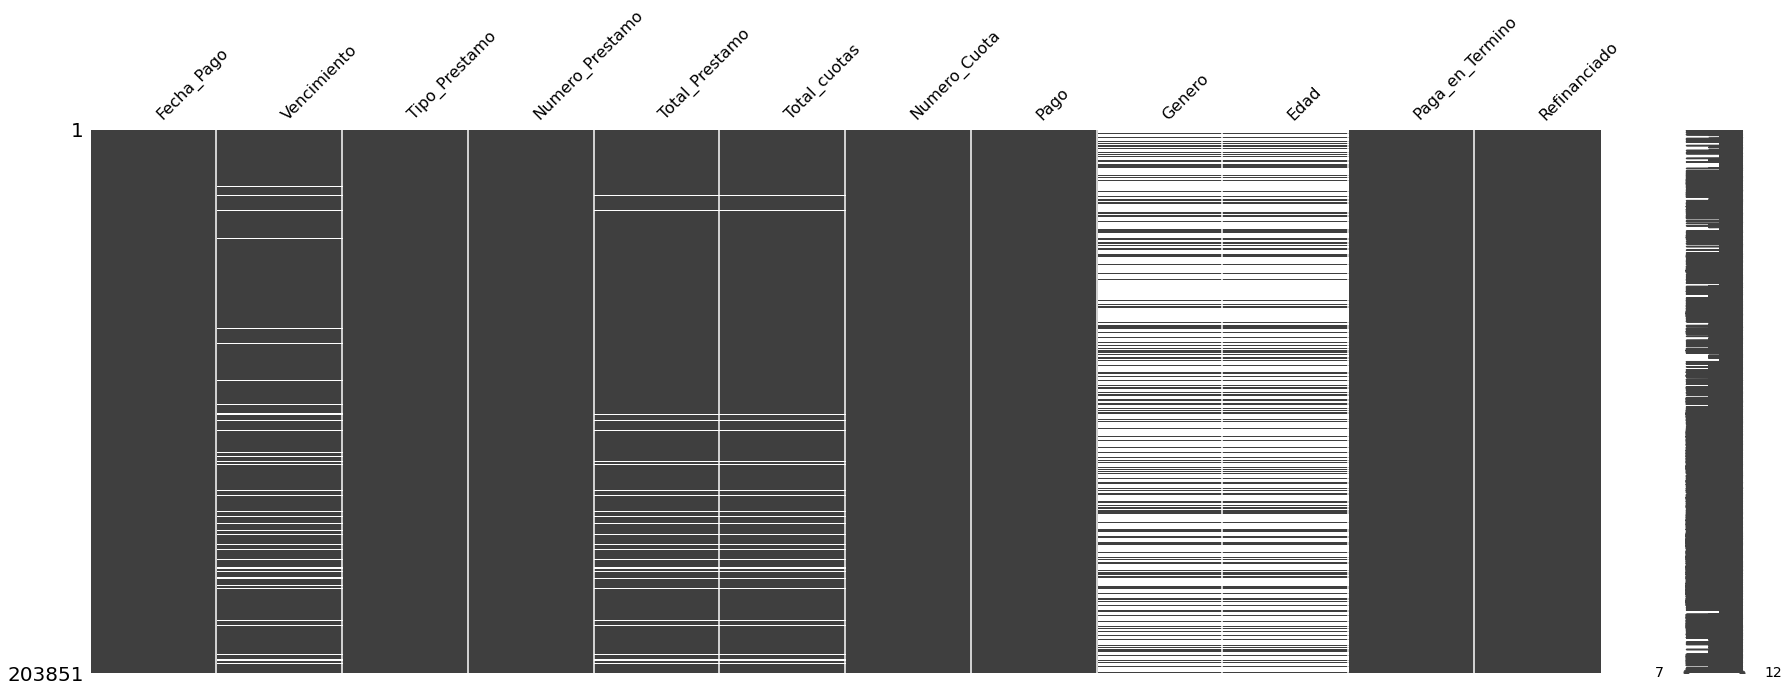

In [10]:
msno.matrix(data_train, figsize=(30,10))

# 3. EDA

### Estadisticas basicas

In [11]:
data_train.describe(include='all')

,Fecha_Pago,Vencimiento,Tipo_Prestamo,Numero_Prestamo,Total_Prestamo,Total_cuotas,Numero_Cuota,Pago,Genero,Edad,Paga_en_Termino,Refinanciado
count,203851,188187,203851.000000,2.038510e+05,1.925540e+05,192554.000000,203851.000000,2.038510e+05,60101,60101.000000,203851.000000,203851.000000
unique,765,887,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,2021-12-06 00:00:00.000,2020-02-20 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN
freq,3289,11459,NaN,NaN,NaN,NaN,NaN,NaN,59112,NaN,NaN,NaN
mean,NaN,NaN,608.314043,8.664691e+06,3.880274e+05,289.261838,86.223035,3.118590e+04,NaN,76.665214,0.755248,0.019818
std,NaN,NaN,393.535936,6.030730e+06,8.941792e+05,126.421119,72.306265,5.061892e+05,NaN,36.531683,0.429941,0.139376
min,NaN,NaN,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000e+00,NaN,5.000000,0.000000,0.000000
25%,NaN,NaN,175.000000,1.093767e+06,3.108436e+04,185.000000,20.000000,4.435000e+01,NaN,44.000000,1.000000,0.000000
50%,NaN,NaN,877.000000,1.099455e+07,8.163954e+04,360.000000,69.000000,2.182100e+02,NaN,64.000000,1.000000,0.000000
75%,NaN,NaN,954.000000,1.100230e+07,3.014630e+05,360.000000,144.000000,8.408350e+02,NaN,122.000000,1.000000,0.000000


### Analisis variable objetivo

Primero se inicia analizando la variable target para analizar si se encuentra balanceado el data set. Observamos que sigue una distribución uniforme, con lo cual no vamos a necesitar recurrir a SMOTE para balancearlo. Concluimos que:

* El dataset se encuentra balanceado
* No se observa presencia de anomalias o outliers

Text(0.5, 1.0, 'Balance de la variable objetivo "Paga_en_Termino"')

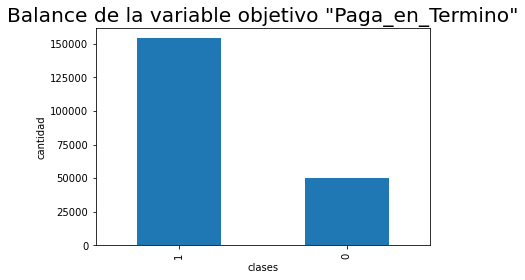

In [12]:
# Grafico
data_train.Paga_en_Termino.value_counts().plot(kind='bar')
# Seteos del gráfico
plt.style.use('fivethirtyeight')
plt.xlabel('clases')
plt.ylabel ('cantidad')
plt.title('Balance de la variable objetivo "Paga_en_Termino"')

### Análisis de variables descriptivas  

Tipo de prestamo: se quitan los que son igual a 0


Eliminar pagos menores a $1

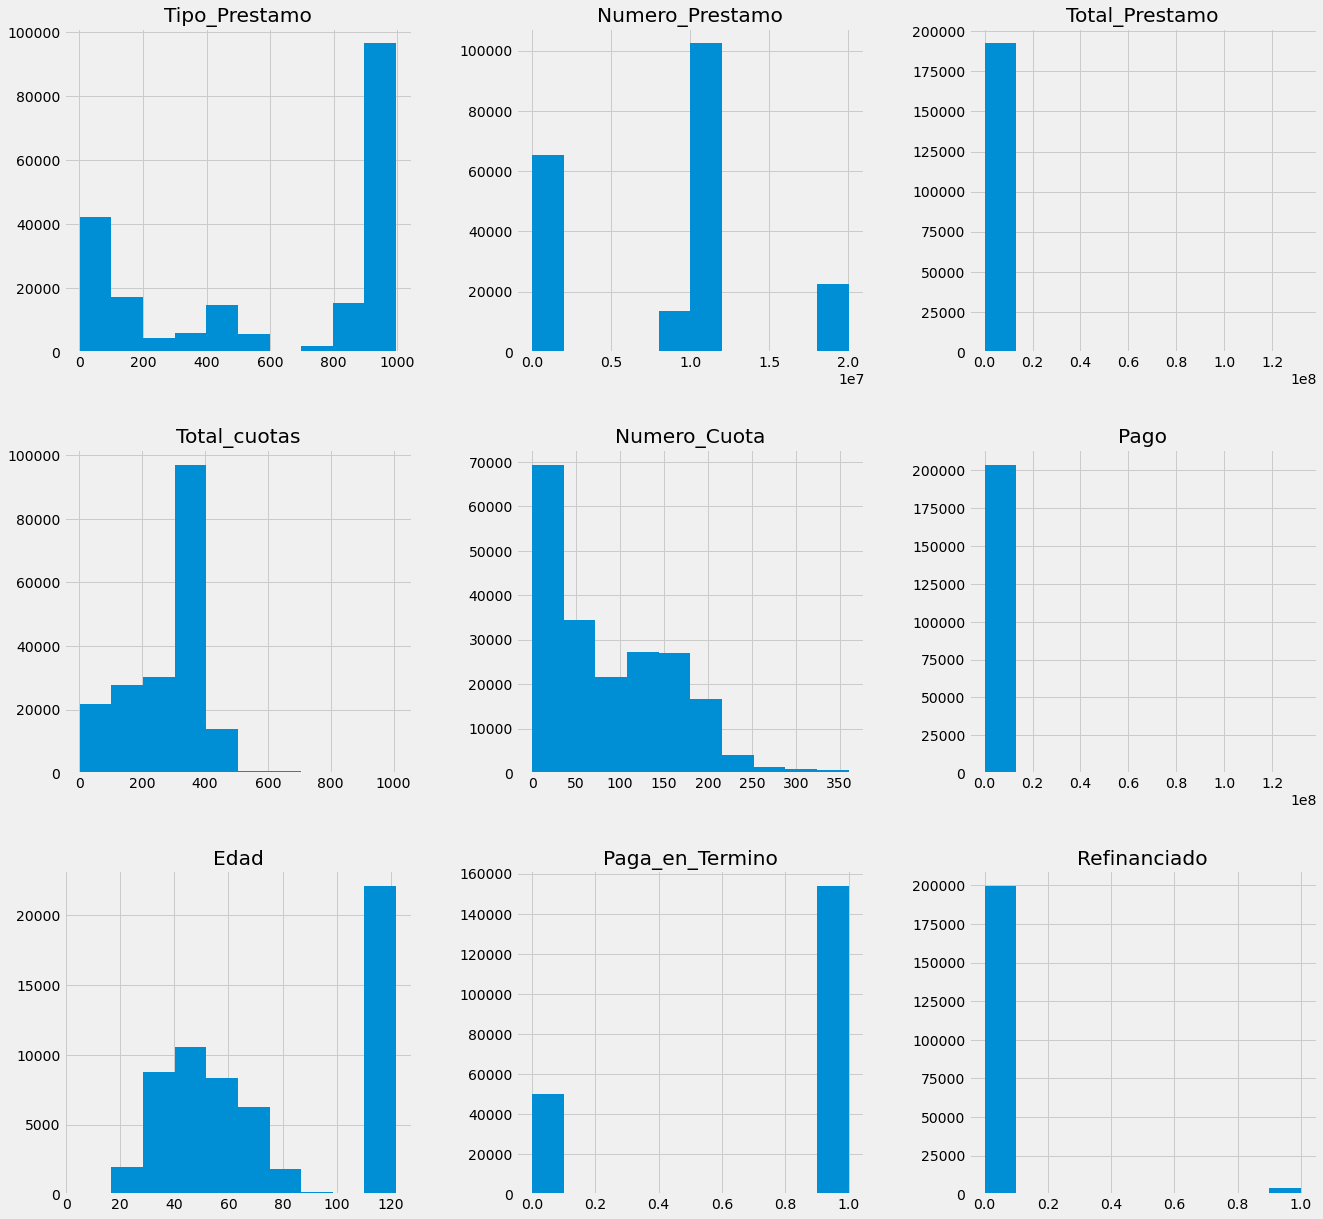

In [13]:
data_train.hist(figsize=(20,20))
plt.show()

### Analisis con la variable objetivo

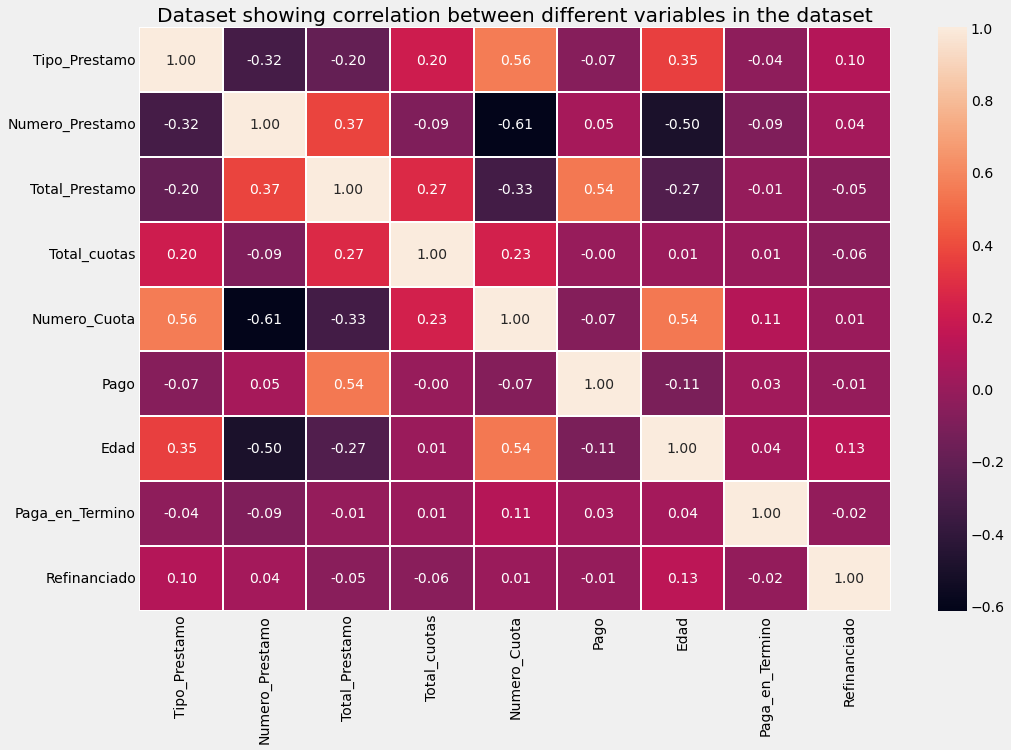

In [14]:
corr = data_train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.2,)
plt.title('Dataset showing correlation between different variables in the dataset')
plt.show()

In [15]:
price_range_corr =  corr.Paga_en_Termino.sort_values(ascending = False)
price_range_corr_top = price_range_corr.head(6)
price_range_corr_bottom = price_range_corr.tail()
print ('top corr: \n{} \n\nbottom corr: \n{}'.format(price_range_corr_top, price_range_corr_bottom))

top corr: 
Paga_en_Termino    1.000000
Numero_Cuota       0.105761
Edad               0.043308
Pago               0.032030
Total_cuotas       0.007140
Total_Prestamo    -0.013663
Name: Paga_en_Termino, dtype: float64 

bottom corr: 
Total_cuotas       0.007140
Total_Prestamo    -0.013663
Refinanciado      -0.017945
Tipo_Prestamo     -0.037825
Numero_Prestamo   -0.092862
Name: Paga_en_Termino, dtype: float64


In [ ]:
sns.pairplot(data_train, hue='Paga_en_Termino')

In [ ]:
sns.pairplot(data_train[price_range_corr_top.index], hue='price_range')

<Figure size 1080x1080 with 0 Axes>

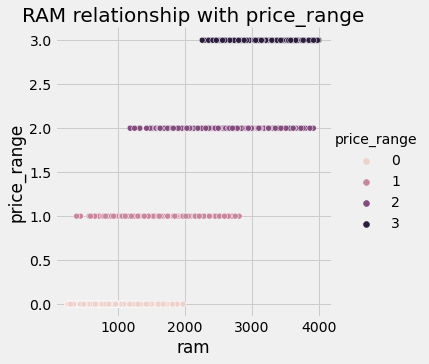

<Figure size 1080x1080 with 0 Axes>

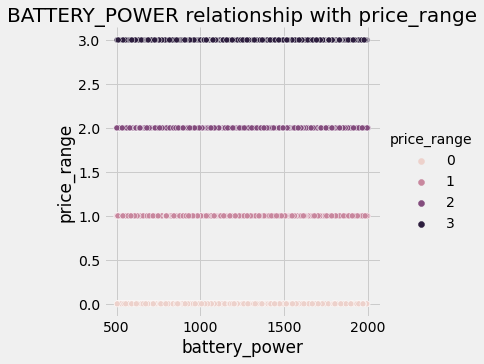

<Figure size 1080x1080 with 0 Axes>

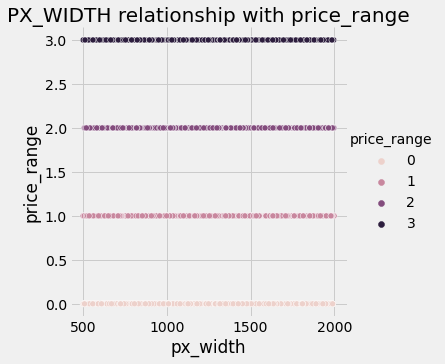

<Figure size 1080x1080 with 0 Axes>

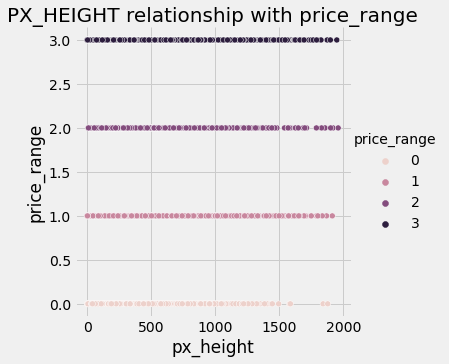

<Figure size 1080x1080 with 0 Axes>

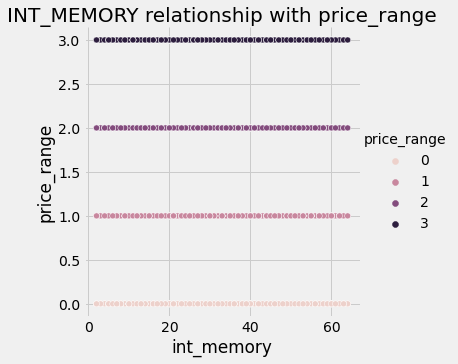

In [19]:
for x in price_range_corr_top[1:].index:
    dsimp.relation_diagram(x, 'price_range', data_train)

# 4. Feature selecction y engenieering


In [88]:
# Se separ entre variables destino y explicativas
X = data_train.drop('price_range', axis = 1)
y = data_train['price_range']

In [21]:
# Se divide el data set para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 1)

## Regresión Lineal 

In [22]:
# Se instancia el modelo
lr = LinearRegression()
# Se fitea el modelo
lr.fit(X_train, y_train)
# Se evalua el modelo
lr_Range = lr.predict(X_test)
lr_Score = lr.score(X_test, y_test)
lr_Mae = mean_absolute_error(y_test, lr_Range)
print('score RL: ', lr_Score)
print('promedio de error absoluto RL', lr_Mae)

score RL:  0.9077139501473082
promedio de error absoluto RL 0.28492595697333567


### Decision Tree Regression

In [23]:
# Se instancia el modelo
dt = DecisionTreeRegressor(max_leaf_nodes=200, random_state = 1)
# Se fitea el modelo
dt.fit(X_train, y_train)
# Prediccion
dt_range = dt.predict(X_test)
# Evaluación del modelo
dt_score = dt.score(X_test, y_test)
dt_Mae = mean_absolute_error(y_test, dt_range)
print('score DT: ', dt_score)
print('promedio de error absoluto DT', dt_Mae)

score DT:  0.8604114826728166
promedio de error absoluto DT 0.1725


### Decision Tree Classifier


In [24]:
# Se instancia el modelo
dtc = DecisionTreeClassifier(max_leaf_nodes=200,random_state = 1)
# Se fitea el modelo
dtc.fit(X_train, y_train)
# Se predice el modelo
dtc_range = dtc.predict(X_test)
# Se evalua el modelo
dtc_score = dtc.score(X_test, y_test)
dtc_mae = mean_absolute_error(y_test, dtc_range)
print('score DT: ', dtc_score)
print('promedio de error absoluto DT', dtc_mae)

score DT:  0.8475
promedio de error absoluto DT 0.1525


### Random Forest



In [25]:
# Se instancia el modelo
rf = RandomForestRegressor()
# Se fitea el modelo
rf.fit(X_train, y_train)
# Se predice el modelo
rf_range = rf.predict(X_test)
# Se evalua el modelo
rf_score = rf.score(X_test,y_test)
rf_mae = mean_absolute_error(y_test, rf_range)
print('score RF: ', rf_score)
print('promedio de error absoluto RF', rf_mae)

score RF:  0.9365432623252614
promedio de error absoluto RF 0.178475


In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Se instancia el modelo
knn = KNeighborsClassifier(n_neighbors=4)
# Se fitea el modelo
knn.fit(X_train, y_train)
# Se predice el modelo
knn_range = knn.predict(X_test)
# Se evalua el modelo
knn_score = knn.score(X_test,y_test)
knn_mae = mean_absolute_error(y_test, rf_range)
print('score KNN: ', knn_score)
print('promedio de error absoluto KNN', knn_mae)



score KNN:  0.8925
promedio de error absoluto KNN 0.178475


In [68]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

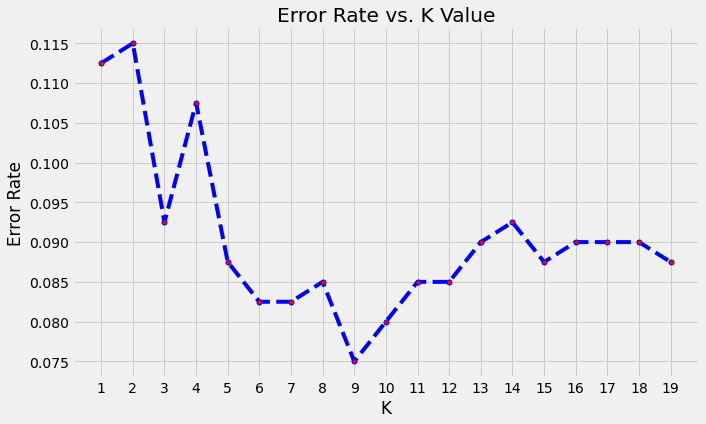

In [76]:
plt.figure(figsize=(10,6))
plt.xticks([x for x in range(21)])
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Se instancia el modelo
knn = KNeighborsClassifier(n_neighbors=9)
# Se fitea el modelo
knn.fit(X_train, y_train)
# Se predice el modelo
knn_range = knn.predict(X_test)
# Se evalua el modelo
knn_score = knn.score(X_test,y_test)
knn_mae = mean_absolute_error(y_test, rf_range)
print('score KNN: ', knn_score)
print('promedio de error absoluto KNN', knn_mae)

score KNN:  0.925
promedio de error absoluto KNN 0.178475


-----------

# CON SELECCION DE VARIABLES

In [90]:
# Se separ entre variables destino y explicativas
X = data_train[price_range_corr_top.index].drop('price_range', axis = 1)
y = data_train['price_range']

In [93]:
# Se divide el data set para el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 1)

In [94]:
# Se instancia el modelo
lr = LinearRegression()
# Se fitea el modelo
lr.fit(X_train, y_train)
# Se evalua el modelo
lr_Range = lr.predict(X_test)
lr_Score = lr.score(X_test, y_test)
lr_Mae = mean_absolute_error(y_test, lr_Range)
print('score RL: ', lr_Score)
print('promedio de error absoluto RL', lr_Mae)

score RL:  0.9089734582451858
promedio de error absoluto RL 0.28137926908735283


### Decision Tree Regression

In [95]:
# Se instancia el modelo
dt = DecisionTreeRegressor(max_leaf_nodes=200, random_state = 1)
# Se fitea el modelo
dt.fit(X_train, y_train)
# Prediccion
dt_range = dt.predict(X_test)
# Evaluación del modelo
dt_score = dt.score(X_test, y_test)
dt_Mae = mean_absolute_error(y_test, dt_range)
print('score DT: ', dt_score)
print('promedio de error absoluto DT', dt_Mae)

score DT:  0.878618680585058
promedio de error absoluto DT 0.15


### Decision Tree Classifier


In [96]:
# Se instancia el modelo
dtc = DecisionTreeClassifier(max_leaf_nodes=200,random_state = 1)
# Se fitea el modelo
dtc.fit(X_train, y_train)
# Se predice el modelo
dtc_range = dtc.predict(X_test)
# Se evalua el modelo
dtc_score = dtc.score(X_test, y_test)
dtc_mae = mean_absolute_error(y_test, dtc_range)
print('score DT: ', dtc_score)
print('promedio de error absoluto DT', dtc_mae)

score DT:  0.865
promedio de error absoluto DT 0.135


### Random Forest



In [97]:
# Se instancia el modelo
rf = RandomForestRegressor()
# Se fitea el modelo
rf.fit(X_train, y_train)
# Se predice el modelo
rf_range = rf.predict(X_test)
# Se evalua el modelo
rf_score = rf.score(X_test,y_test)
rf_mae = mean_absolute_error(y_test, rf_range)
print('score RF: ', rf_score)
print('promedio de error absoluto RF', rf_mae)

score RF:  0.9441091622665938
promedio de error absoluto RF 0.15910000000000002


In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
# Se instancia el modelo
knn = KNeighborsClassifier(n_neighbors=4)
# Se fitea el modelo
knn.fit(X_train, y_train)
# Se predice el modelo
knn_range = knn.predict(X_test)
# Se evalua el modelo
knn_score = knn.score(X_test,y_test)
knn_mae = mean_absolute_error(y_test, rf_range)
print('score KNN: ', knn_score)
print('promedio de error absoluto KNN', knn_mae)



score KNN:  0.8925
promedio de error absoluto KNN 0.15910000000000002


In [100]:
error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

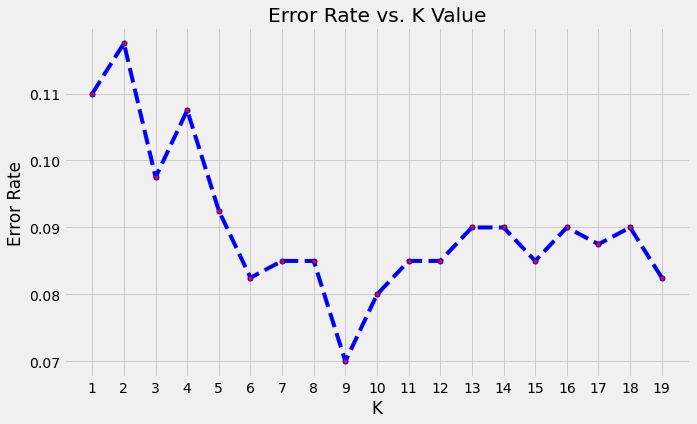

In [101]:
plt.figure(figsize=(10,6))
plt.xticks([x for x in range(21)])
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [102]:
# Se instancia el modelo
knn = KNeighborsClassifier(n_neighbors=9)
# Se fitea el modelo
knn.fit(X_train, y_train)
# Se predice el modelo
knn_range = knn.predict(X_test)
# Se evalua el modelo
knn_score = knn.score(X_test,y_test)
knn_mae = mean_absolute_error(y_test, rf_range)
print('score KNN: ', knn_score)
print('promedio de error absoluto KNN', knn_mae)

score KNN:  0.93
promedio de error absoluto KNN 0.15910000000000002
